# "Pumping It Up" Predicting Failing Wells

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

# Heatmap of Water Pump Concentration 

I created this heatmap in Tableau and imported it into the cell below, you can do this by creating a Tableau site with a folder for your desired visualizations, go into your Tableau dashboard, click on "server" -> "publish workbook", you can then paste your site URL into the box and it will upload to your Tableau site. From your site you can then find the script code under the "share" option on your visualization. Simply copy this code and type %%HTML into your Jupyter Notebook and paste the code below it. 

This heatmap displays the following
- Looking at the map as a whole (zoomed out) you can see that there is some missing data for longitude that is causing there to be some heat marks in the middle of the ocean (THATS BAD!), so we can use this visualization to detect missing data right away without having to do formal code
- Zooming in on the country of Tanzania, we can see the regions of the country that have the highest concentration of pumps

Note: Since Tableau is for people who have money apparently, I was unable to get access to their online publishing tool for more than 10 days, therefore I snipped and pasted the Tableau viz into the cells below, I still think its pretty cool and informative :)
The code one would use to embed an interactive Tableau visualization is in the cell below anyway, just in case anyone is curious about how to embed their visualizations into their jupyter notebooks who can afford a Tableau Online account

In [ ]:
# %%HTML
# <script type='text/javascript' src='https://10ay.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1368px; height: 713px;'><object class='tableauViz' width='1368' height='713' style='display:none;'><param name='host_url' value='https%3A%2F%2F10ay.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;narrativevisualizations' /><param name='name' value='PumpConcentrationHeatmap&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /><param name='filter' value='iframeSizedToWindow=true' /></object></div>

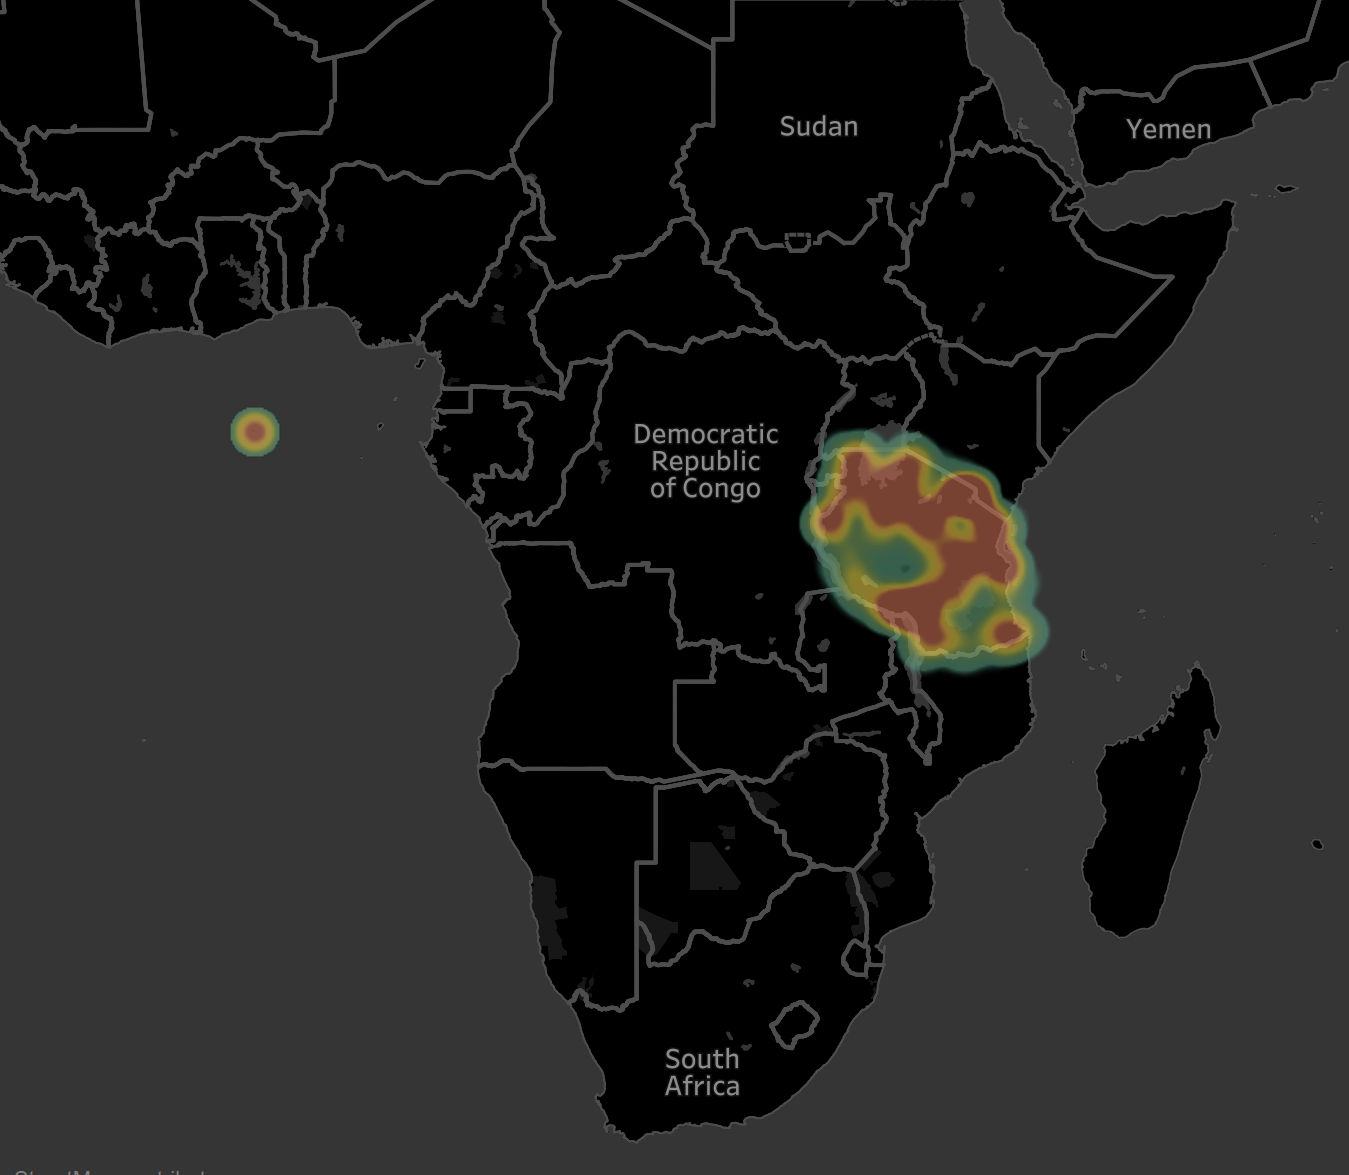
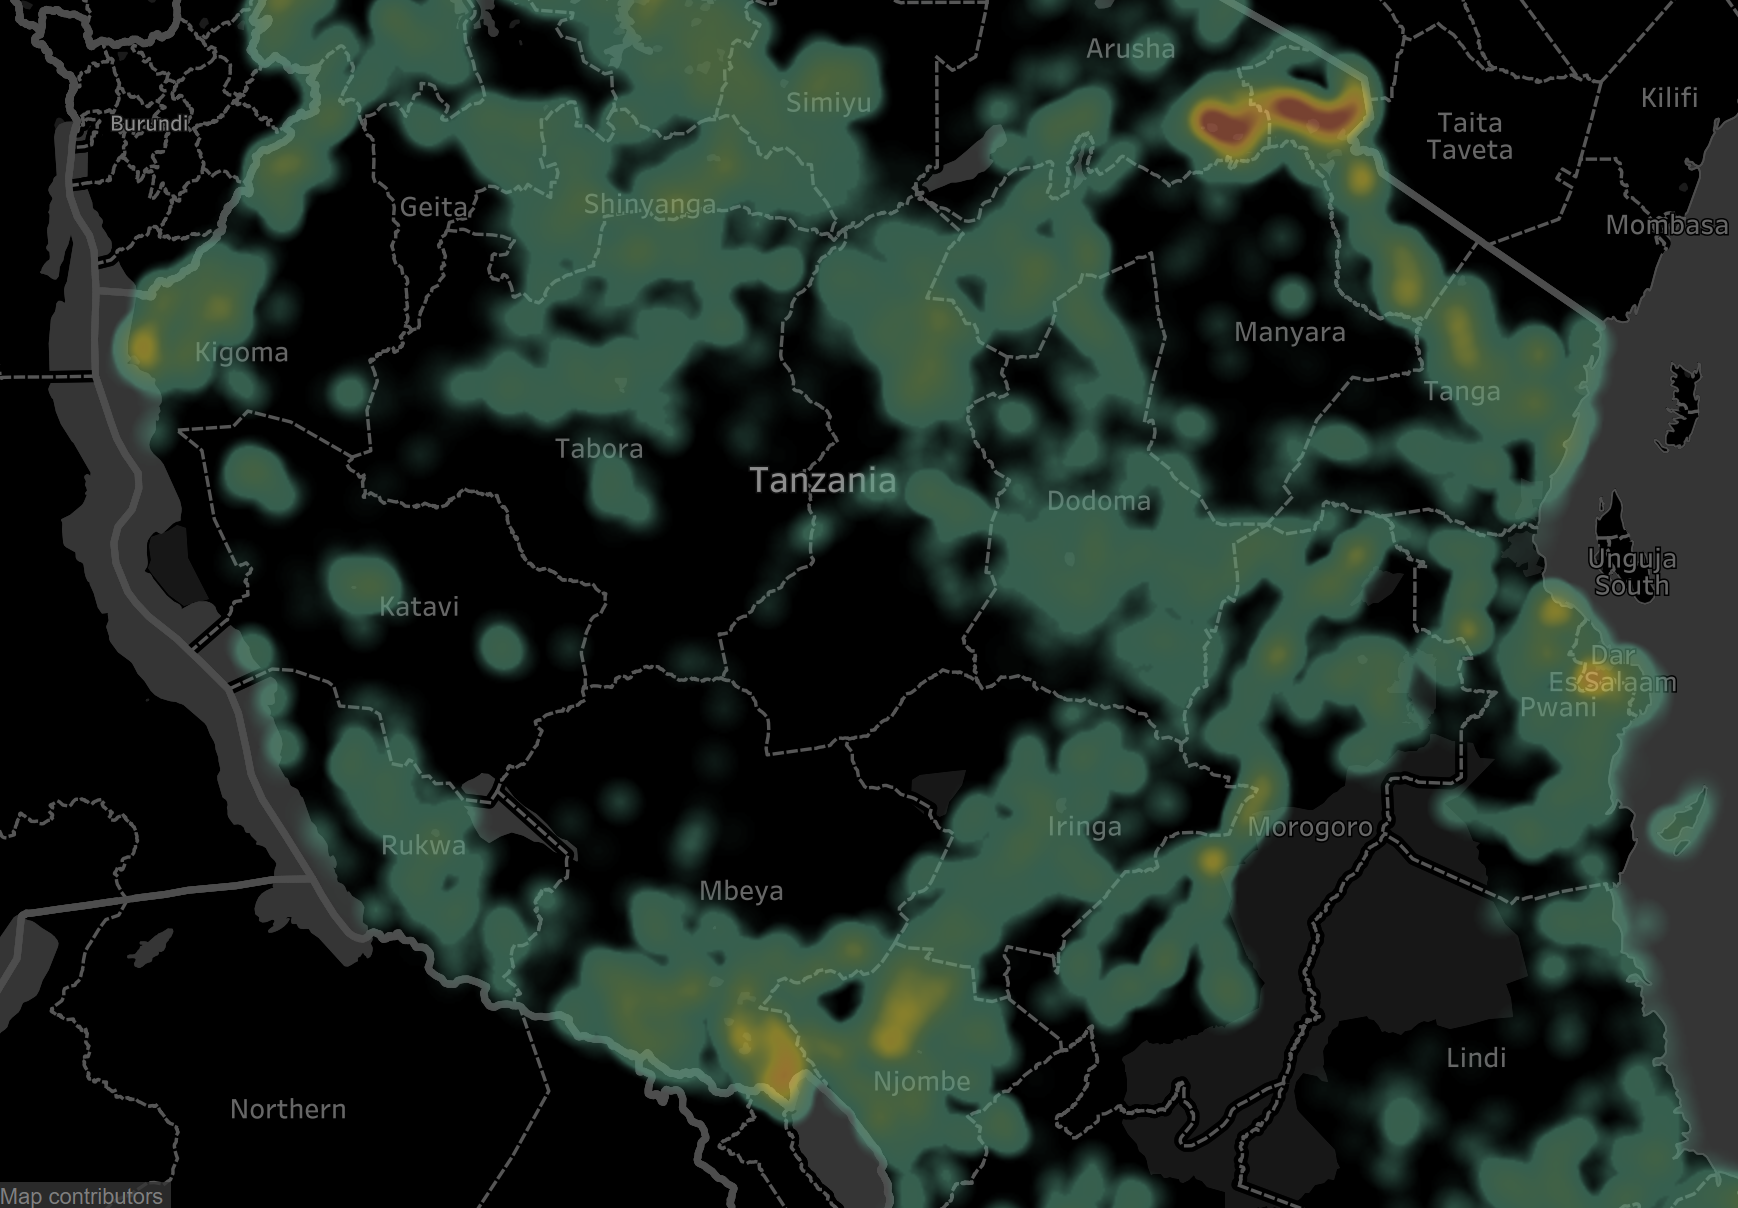

# Importing Packages

-  Pandas - allows us to play around with data frames
-  Numpy - allows us to perform mathematical functions with the data, create numpy arrays (which are required in SciKitLearn)
-  Matplotlib.pyplot - plotting package that we will not use, BUT YOU COULD! (you have to have %matplotlib inline, to show plots)
-  Seaborn - seaborn is an advanced visualization package in Python
-  OS - os allows us to see and change our working directory
-  InteractiveShell - allows us to run multiple commands in the same cell 
-  pd.set_options - this allows us to see all of our columns and our rows if we want
-  plotly - advanced visualization package (https://towardsdatascience.com/its-2019-make-your-data-visualizations-interactive-with-plotly-b361e7d45dc6)
-  plotly_express - advanced viz package (same link above)
-  cufflinks - advanced viz package (https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e)

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#this allows us to see all of our columns or rows in jupyter notebook
pd.set_option('display.max_columns', None)

#plotly provides a robust library of interactive charts, where you can explore the data in numerous ways,
import plotly.offline as py
import plotly_express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import missingno as msno

In [2]:
#check the working directory
os.getcwd()
#we need to change the working directory to wherever our data is stored
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Data Sets')

'C:\\Users\\Sam Cannon\\Desktop\\Python\\Tanzania Water Pump Project'

In [3]:
#import the train, test and label csv's from local storage
train = pd.read_csv('WaterPumpTrain.csv')
test = pd.read_csv('WaterPumpTest.csv')
labels = pd.read_csv('waterPumpLabels.csv')

In [4]:
#now our data is imported, we need to append the labels to the end of the train set, merging the data together on a 
# shared column, which in this case is id, ensures that our values match up
train = train.merge(labels, on='id')

In [5]:
#lets check to see if it worked how we wanted it to, status_group (our labels) is our last column now
train.head(1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [13]:
train.duplicated().sum()

0

In [75]:
#look at overall stats for features, note which ones are objects and which ones are floats or integers
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [8]:
#the first thing that we are looking at is missing values
train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [9]:
#we also have a lot of data in this set who's values are '0', lets see all of these counts, then lets replace them with 
#np.nan
########BE CAREFUL HERE, NOTE THAT PLACING 0 IN THE SUBSET HERE WOULD ALSO CODE VALUES OF 'FALSE' AS 0, AND WE DONT WANT
########## TO REPLACE FALSE VALUES!!! DO NOT INCLUDE PERMIT OR PUBLIC MEETING IN NAN REPLACEMENT IN THE CELL BELOW
train[train == 0].count()

id                           1
amount_tsh               41639
date_recorded                0
funder                       0
gps_height               20438
installer                    0
longitude                 1812
latitude                     0
wpt_name                     0
num_private              58643
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code               23
lga                          0
ward                         0
population               21381
public_meeting            5055
recorded_by                  0
scheme_management            0
scheme_name                  0
permit                   17492
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

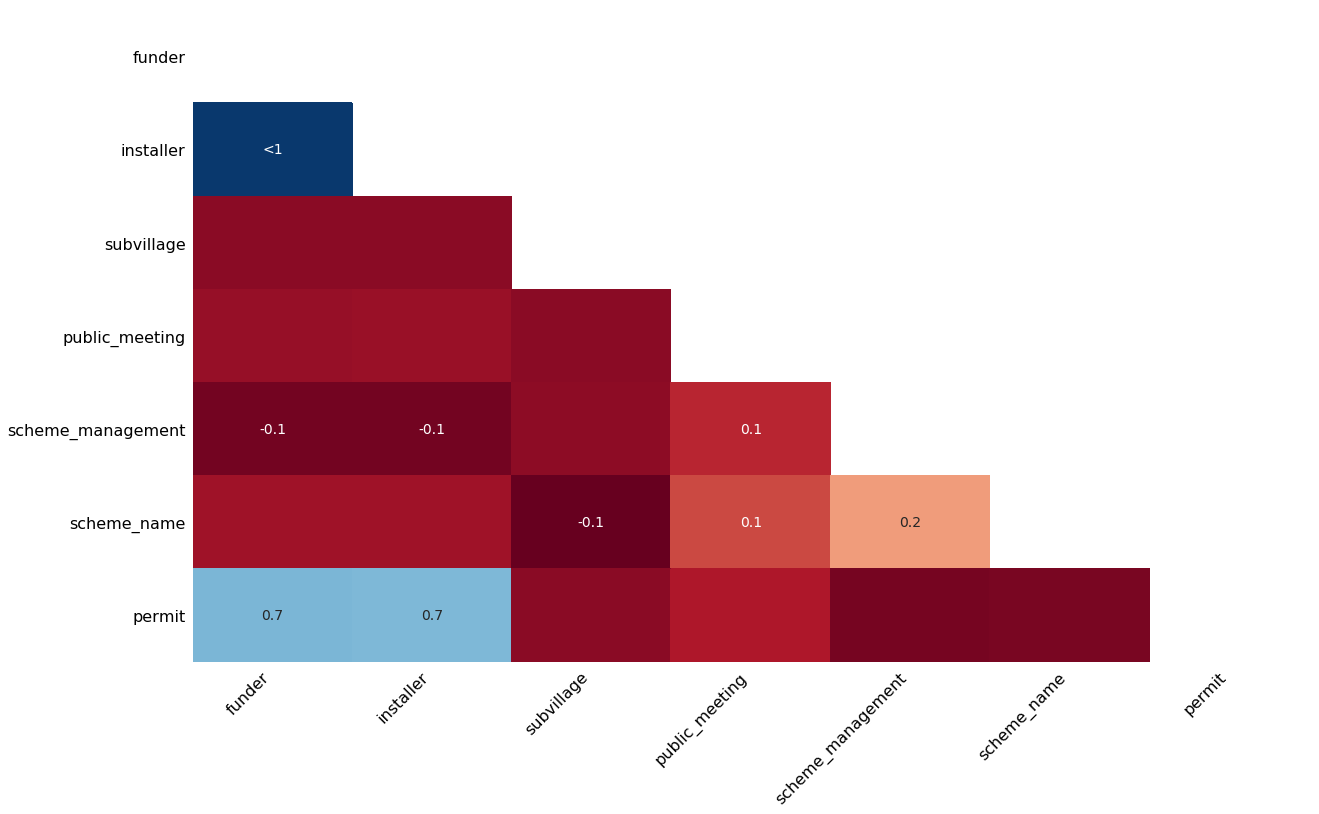

In [45]:
msno.heatmap(train)

In [36]:
train['status_group'] = train['status_group'].map({'non functional':0, 'functional needs repair':1, 'functional':2})

In [37]:
scaled_df = train.select_dtypes(exclude=[np.object])
scaled_df.shape

(59400, 11)

In [38]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 11 columns):
id                   59400 non-null int64
amount_tsh           59400 non-null float64
gps_height           59400 non-null int64
longitude            59400 non-null float64
latitude             59400 non-null float64
num_private          59400 non-null int64
region_code          59400 non-null int64
district_code        59400 non-null int64
population           59400 non-null int64
construction_year    59400 non-null int64
status_group         59400 non-null int64
dtypes: float64(3), int64(8)
memory usage: 5.4 MB


In [39]:
column_names = scaled_df.columns

In [40]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(scaled_df)
print (scaled_df)

scaled_df = pd.DataFrame(scaled_df).corr(method='pearson')

[[ 1.51293279  1.89566509  1.04125207 ... -0.15039928  0.733857
   0.8856327 ]
 [-1.32099011 -0.10597003  1.05423701 ...  0.21228981  0.74541633
   0.8856327 ]
 [-0.1307574  -0.09762988  0.02554104 ...  0.14866014  0.74436548
   0.8856327 ]
 ...
 [-0.00270973 -0.10597003 -0.96420011 ... -0.38158706 -1.36678787
   0.8856327 ]
 [-0.27190351 -0.10597003 -0.96420011 ... -0.38158706 -1.36678787
   0.8856327 ]
 [-0.50189521 -0.10597003 -0.68863079 ... -0.06343874  0.73700955
   0.8856327 ]]


C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [41]:
scaled_df.columns = column_names

In [42]:
scaled_df.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year', 'status_group'],
      dtype='object')

(11, 11)

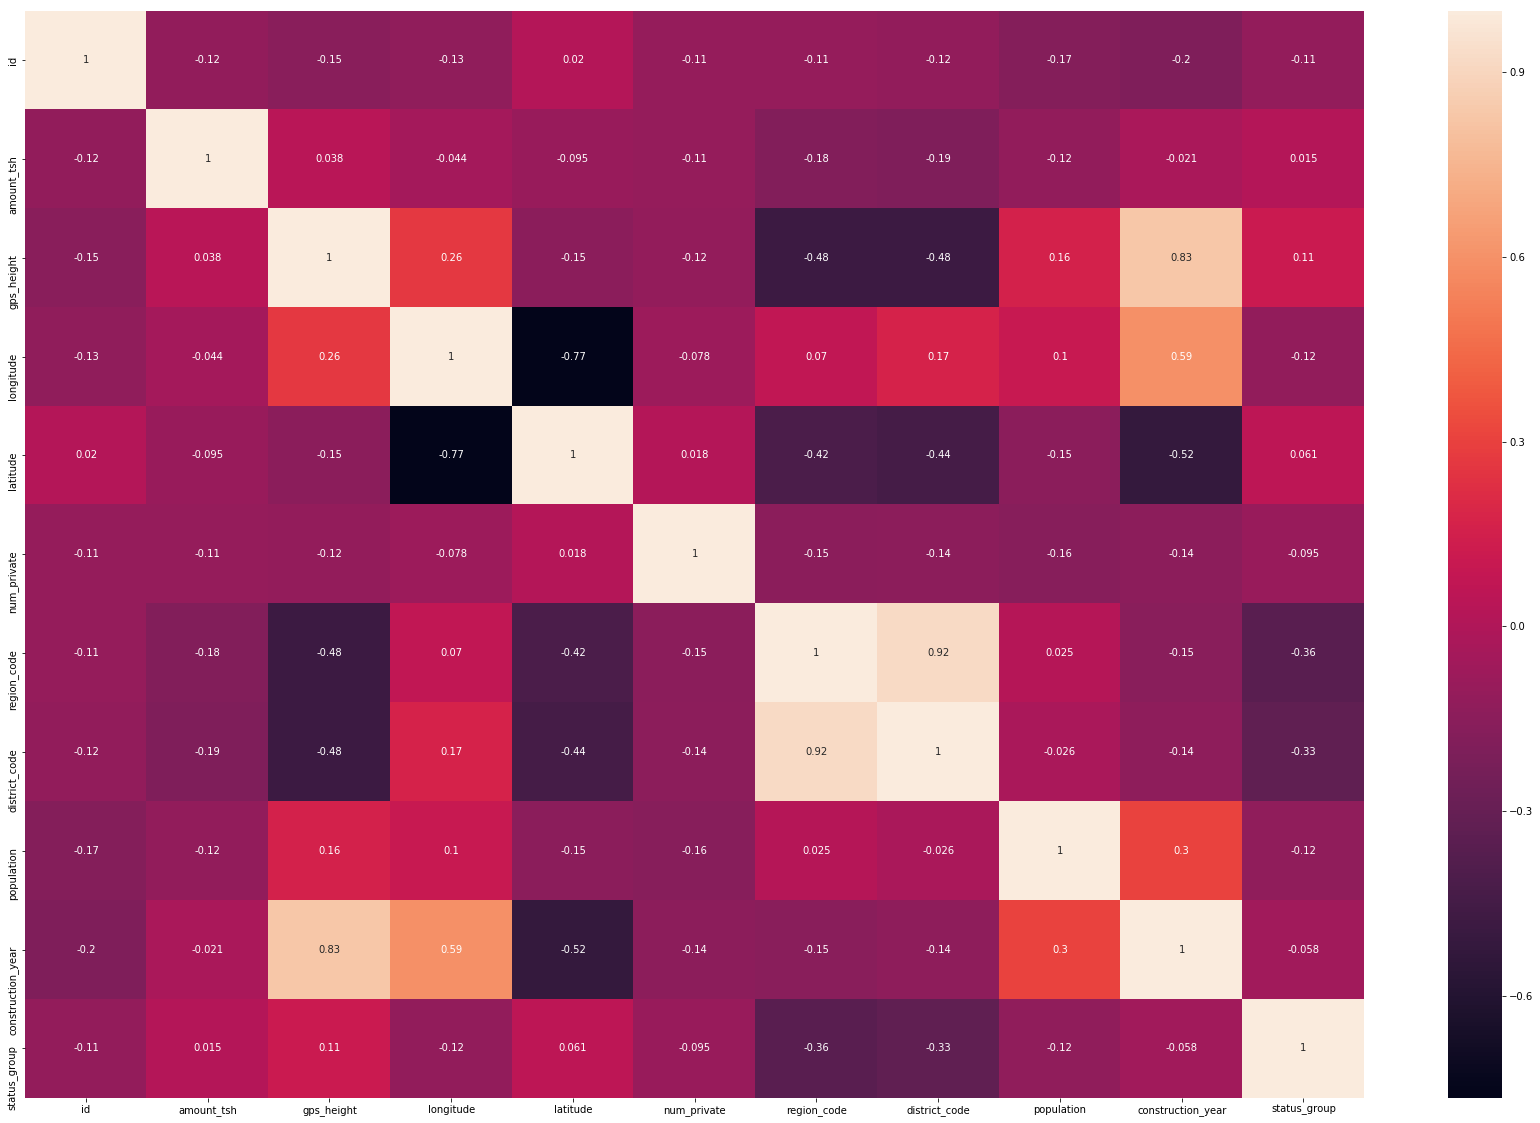

In [43]:
fig, ax=plt.subplots(figsize=(30, 20))
corr = scaled_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
corr.shape

# Removing Redundant and Highly Unique Features

__We will begin by removing features that are duplicates, and then we will remove features that are highly unique, since we must keep our dummy variable count below our sample size and these unique features may not be lending much information on the variability between pump status_group__

In [10]:
#there seem to be several features that are redundant here, lets remove those that are essentially direct copies or similar 
#lets start with waterpoint features
train.groupby(['waterpoint_type', 'waterpoint_type_group']).size()
#looks like we can remove either one since they are copies

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [11]:
#lets look at the source features
train.groupby(['source_class', 'source_type', 'source']).size()
#looks like we can retain any of them to represent the other two, lets keep source since it gives us more info without
# a ton of categories

source_class  source_type           source              
groundwater   borehole              hand dtw                  874
                                    machine dbh             11075
              shallow well          shallow well            16824
              spring                spring                  17021
surface       dam                   dam                       656
              rainwater harvesting  rainwater harvesting     2295
              river/lake            lake                      765
                                    river                    9612
unknown       other                 other                     212
                                    unknown                    66
dtype: int64

In [12]:
#lets look at the quantity features
train.groupby(['quantity', 'quantity_group']).size()
#these are copies, we can remove one

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [13]:
#lets look at quality features
train.groupby(['quality_group', 'water_quality']).size()
#looks like we can use the water_quality feature to represent quality with a good number of categories, capturing more info

quality_group  water_quality     
colored        coloured                490
fluoride       fluoride                200
               fluoride abandoned       17
good           soft                  50818
milky          milky                   804
salty          salty                  4856
               salty abandoned         339
unknown        unknown                1876
dtype: int64

In [14]:
#lets look at the payment feature
train.groupby(['payment_type', 'payment']).size()
#looks like we can remove either since they are direct copies

payment_type  payment              
annually      pay annually              3642
monthly       pay monthly               8300
never pay     never pay                25348
on failure    pay when scheme fails     3914
other         other                     1054
per bucket    pay per bucket            8985
unknown       unknown                   8157
dtype: int64

In [15]:
#lets look at the management features
train.groupby(['management_group', 'management']).size()
#looks like we can retian management_group and have less categories or take management and have a little more info, still
#without an overwhelming amount of categories, lets take management to see if we can increase predictive ability with 
#that little bit of more info

management_group  management      
commercial        company               685
                  private operator     1971
                  trust                  78
                  water authority       904
other             other                 844
                  other - school         99
parastatal        parastatal           1768
unknown           unknown               561
user-group        vwc                 40507
                  water board          2933
                  wua                  2535
                  wug                  6515
dtype: int64

In [16]:
#lets look at extraction features now 
train.groupby(['extraction_type_class', 'extraction_type_group', 'extraction_type']).size()
#looks like we could retain extraction_type_class and have less categories to deal with or go with extraction_type and have
#more info, but more categories...lets keep extraction_type

extraction_type_class  extraction_type_group  extraction_type          
gravity                gravity                gravity                      26780
handpump               afridev                afridev                       1770
                       india mark ii          india mark ii                 2400
                       india mark iii         india mark iii                  98
                       nira/tanira            nira/tanira                   8154
                       other handpump         other - mkulima/shinyanga        2
                                              other - play pump               85
                                              other - swn 81                 229
                                              walimi                          48
                       swn 80                 swn 80                        3670
motorpump              mono                   mono                          2865
                       other motorpum

In [17]:
#lets look at the scheme features now
train.groupby(['scheme_management', 'scheme_name', 'management']).size()

scheme_management  scheme_name                   management      
Company            BFFS                          company               1
                   Bagamoyo Wate                 company               5
                                                 parastatal            3
                                                 private operator     49
                                                 vwc                   3
                   Bagamoyo wate                 other                 2
                                                 parastatal           18
                                                 private operator    153
                                                 vwc                  37
                   Borehole                      vwc                   1
                   Borehole drilling project     vwc                   1
                   Bulamba piped scheme          company               2
                   Burieni water supply          company  

In [18]:
train.groupby(['scheme_name', 'status_group']).size()
#maybe we should keep scheme_name, there are some that are more represented than others, potential for increased predictive
# power, we can drop scheme_management, it has missingness and is about the 
#same as managemen

scheme_name                  status_group           
14 Kambarage                 functional                   7
A                            functional                  23
                             functional needs repair      2
                             non functional              17
ADP                          functional                   6
                             non functional               3
ADP Simbo                    functional                  15
                             non functional              10
ADP Simbu                    non functional               1
ADRA                         functional                   7
                             non functional               1
AIC                          functional                   1
AIC kahunda                  functional                   1
AMREF                        non functional               3
AMRSF                        non functional               1
AUWASA Pipe scheme           functional        

In [19]:
#now lets look at lga and ward
train.groupby(['lga', 'ward']).size()
#lets drop ward, lga represents the area, we have region as well as basin, so the location of the well is well represented
#in our other features, we also have the district code, so this seems like it would be adding minimal value

lga           ward         
Arusha Rural  Bangata           33
              Bwawani           37
              Ilkiding'a        86
              Kimnyaki          79
              Kiranyi          115
              Kisongo           33
              Mateves           22
              Mlangarini        92
              Moivo             44
              Moshono           44
              Murieti           29
              Musa              29
              Mwandeti          17
              Nduruma          205
              Oldonyosambu      77
              Oljoro             8
              Olkokola         133
              Oltroto           75
              Oltrumet          52
              Sokoni II         42
Arusha Urban  Baraa              2
              Daraja Mbili       3
              Elerai            11
              Engutoto           1
              Kaloleni           5
              Kimandolu          2
              Lemara             4
              Levolosi     

In [20]:
#lets look at coding
train.groupby(['region_code', 'district_code']).size()

region_code  district_code
1            0                  23
             1                 888
             3                 361
             4                 347
             5                 358
             6                 224
2            1                 189
             2                1206
             3                 109
             5                 201
             6                 310
             7                1009
3            1                 595
             2                 519
             3                 877
             4                1225
             5                 620
             6                 109
             7                 434
4            1                 698
             2                 408
             3                 323
             4                 110
             5                 293
             6                 266
             7                 127
             8                 288
5            1              

In [21]:
#region and region_code are redundant, with one you have the other, lets drop region code, keep district_code

In [22]:
#lets look at basin and subvillage
train.groupby(['basin', 'subvillage']).size()
#lets drop subvillage, too many uniques, no clear dominance, and basin gives us a broad coverage of the subvillage areas
# while the region, district, basin all give us good location information, not to mention longitude and latitude

basin        subvillage        
Internal     Abdujumbe              3
             Afandi                 2
             Ahara                  1
             Aicho Kaskazini        1
             Aicho Kusini           1
             Alagwa                 5
             Alairataat             3
             Alakirikir             4
             Alasai                 1
             Aleilelai              4
             Alsini                 2
             Amani                  3
             Ambara                 1
             Ampa                   2
             Angweduru A            1
             Ansi                   2
             Ants A                 4
             Ants B                 3
             Araa                   1
             Araa Mkunjo            1
             Arahati                4
             Arati                  5
             Ariahati               1
             Arii                   1
             Arkaria                5
             Arri 

In [23]:
#lets look at wpt_name, see how many values there are
train.groupby(['wpt_name', 'status_group']).size()

wpt_name                   status_group           
24                         non functional                1
A Kulwa                    non functional                1
A Saidi                    functional                    1
Abass                      functional                    1
Abbas                      functional                    1
Abdala Hamisi              functional                    1
Abdala Mwandute            non functional                1
Abdalaa                    non functional                1
Abdalah                    functional                    1
                           non functional                2
Abdalah Ali                non functional                1
Abdalah Mashaka            functional                    1
Abdalah Miliki             non functional                1
Abdalah Mwakibona          functional                    1
Abdalah Shombe             functional                    1
Abdalamani Mussa           functional                    1
Abdal

In [24]:
#these are very unique values, names of individual water points for each pump, these won't hold much power in my
#opinion, it would be unnecessary to try and put this into the model I think, convince me otherwise, I'm feeling sassy
#lets drop it 

# Get Them Out of Here!
Redundant or uninformative features are assigned to a variable, unlucky_features, unlucky_features is then dropped from the train data set by using pd.drop(). In order for pd.drop() to work correctly here, we must add axis=1 after our variable in perenthesis, axis=1 means that we are wanting to drop columns whereas axis=0 would be dropping rows. Finally, our 
inplace=True argument ensures that we are not making a copy of our current data set, but we are instead making changes that will persist over the current data set

# Overview of why I dropped these features
- id was dropped becuase it is a relatively meaningless ordinal variable
- wpt_name was dropped becuase it is highly unique
- recorded_by was dropped becuase it was the same value for every data point
- waterpoint_type_group was dropped becuase it is redundant
- source_type was dropped becuase it is redundant
- source_class was dropped becuase it is redundant
- quantity_group was dropped becuase it is redundant
- quality_group was dropped becuase it is redundant
- payment_type was dropped becuase it is redundant
- management_group was dropped becuase it is redundant
- extraction_type_group was dropped becuase it is redundant
- extraction_type_class was dropped becuase it is redundant
- region_code was dropped becuase it is redundant
- subvillage was dropped becuase it was highly unique and was redundant with respect to location information (we have enough location information)
- scheme_management was dropped becuase it is redundant
- ward was dropped becuase it is redundant with respect to location information and it was highly unique
- num_private was dropped becuase it was missing most of the data
- amount_tsh was dropped becuase it was missing most of the data

In [5]:
#store our features that we want to drop inside of a variable
unlucky_features = ['id', 'wpt_name', 'recorded_by', 'waterpoint_type_group', 'source_type', 
                    'source_class', 'quantity_group', 'quality_group', 'payment_type', 'region_code',
           'management_group', 'extraction_type_group', 'extraction_type_class', 
           'subvillage', 'scheme_management', 'ward', 'num_private', 'amount_tsh']

#drop our unlucky features
train.drop(unlucky_features, axis=1, inplace=True)

#check to see if we dropped our features
train.columns
#looks like it worked

Index(['date_recorded', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'region', 'district_code', 'lga', 'population',
       'public_meeting', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
       'source', 'waterpoint_type', 'status_group'],
      dtype='object')

In [93]:
#now lets take a look at our missing values once more
train.isna().sum()

date_recorded            0
funder                3635
gps_height               0
installer             3655
longitude                0
latitude                 0
basin                    0
region                   0
district_code            0
lga                      0
population               0
public_meeting        3334
scheme_name          28166
permit                3056
construction_year        0
extraction_type          0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 23 columns):
date_recorded        59400 non-null object
funder               55765 non-null object
gps_height           59400 non-null int64
installer            55745 non-null object
longitude            59400 non-null float64
latitude             59400 non-null float64
basin                59400 non-null object
region               59400 non-null object
district_code        59400 non-null int64
lga                  59400 non-null object
population           59400 non-null int64
public_meeting       56066 non-null object
scheme_name          31234 non-null object
permit               56344 non-null object
construction_year    59400 non-null int64
extraction_type      59400 non-null object
management           59400 non-null object
payment              59400 non-null object
water_quality        59400 non-null object
quantity             59400 non-null object
source               59400 non-nu

# CATEGORICAL STRING DATA VISUALIZATION

we should start visualizing some of these features to determine their relationship to pump functionality, then we 
can decide on whether to keep them, drop them, or impute values for missingness, we will start looking at categorical
string/object features 

__NOTE: I left in the plotly code in a lot of these charts becuase I wanted anyone to be able to replicate the spirit of these visualizations in plotly if they were so inclined, the seaborn code provides a grouped bar chart instead of the stacked bar charts in plotly, the plotly visualizations are provided in the PDF accompanying this repository__

<Figure size 1296x720 with 0 Axes>

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

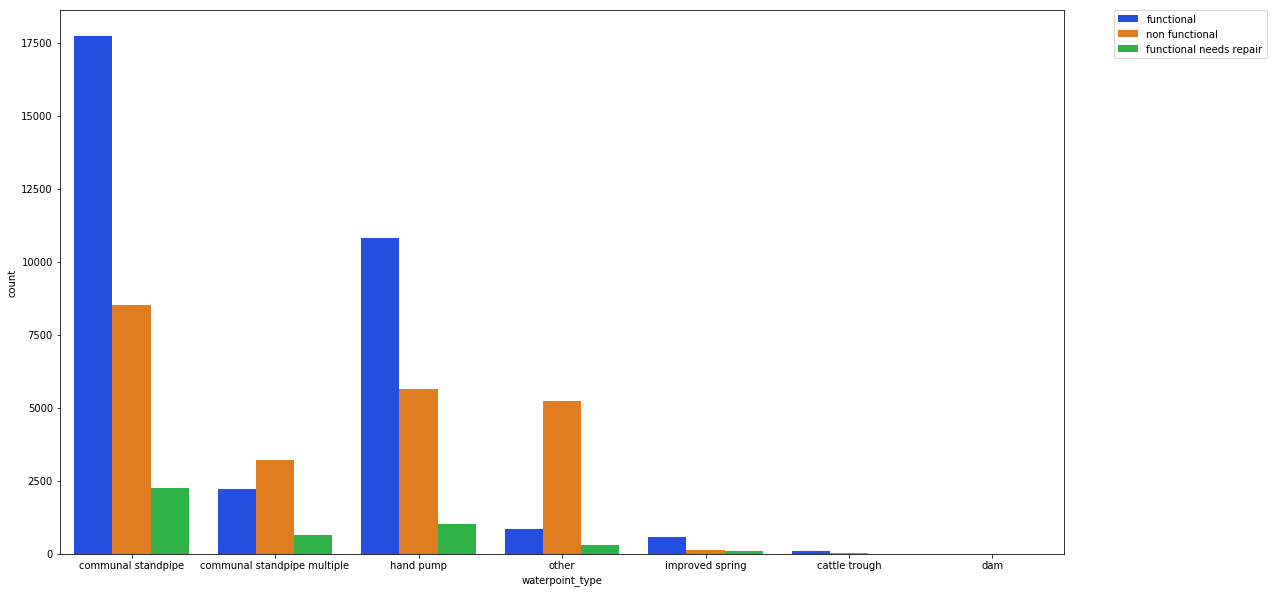

In [6]:
#starting at waterpoint_type
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='waterpoint_type',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.waterpoint_type.value_counts()
# px.histogram(train, x='waterpoint_type', color='status_group', title='Type of Waterpoint', template='plotly_dark')

In [30]:
#there appears to be some real differences in waterpoint_types here, definitely a good feature 

<Figure size 1296x720 with 0 Axes>

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

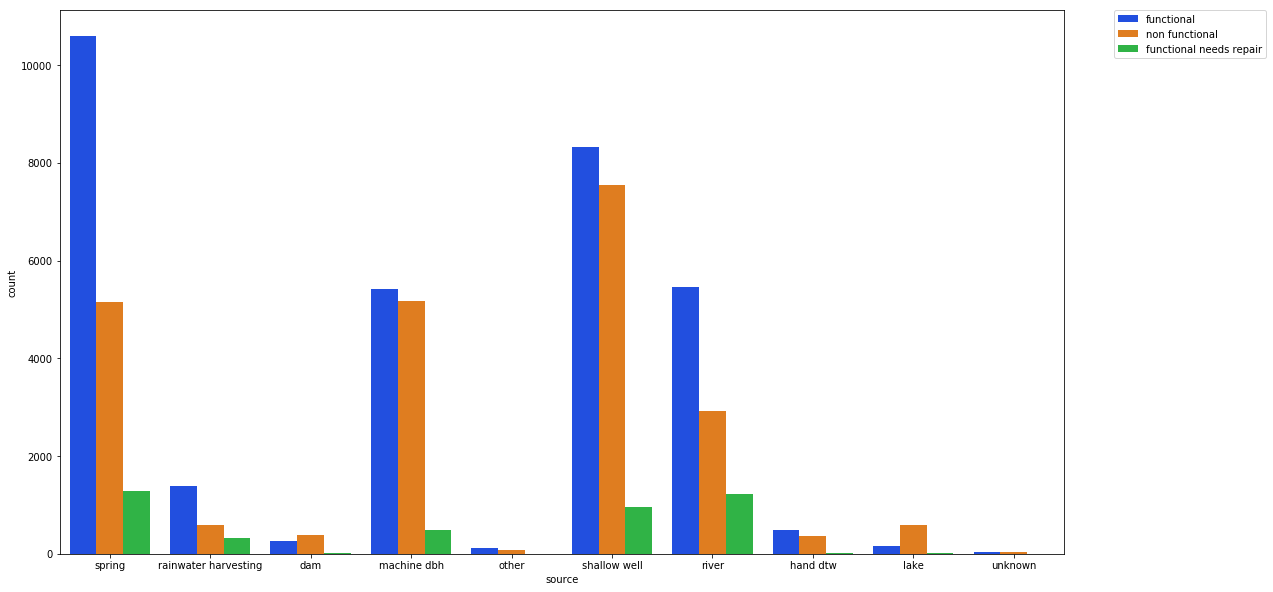

In [7]:
#look at source
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='source',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.source.value_counts()
# px.histogram(train, x='source', color='status_group', title='Water Source of Pump', template='plotly_dark')

In [32]:
#it appears as though there are certain categories of source that have fewer percentages of non functional pumps, 
#particularly spring sources look to be more successful than shallow wells, which have a commensurate number of data points


<Figure size 1296x504 with 0 Axes>

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

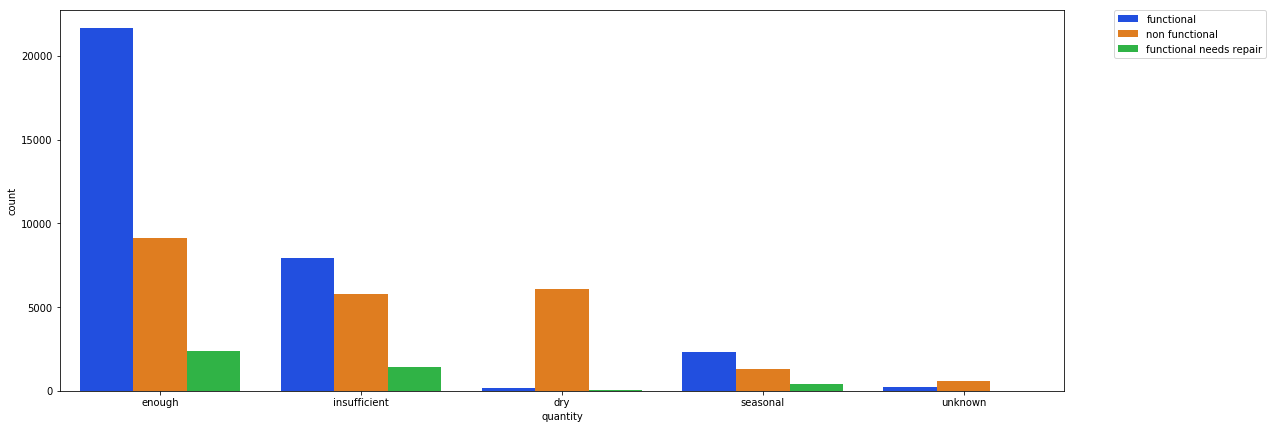

In [8]:
#lets look at quantity
plt.figure(figsize=(18, 7))
sns.countplot(data=train,x='quantity',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.quantity.value_counts()
# px.histogram(train, x='quantity', color='status_group', title='How Much Water is Available by Pump Status', 
#             template='plotly_dark')

In [34]:
#it appears when the quantity is lower, the pump failures may increase

<Figure size 1296x720 with 0 Axes>

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

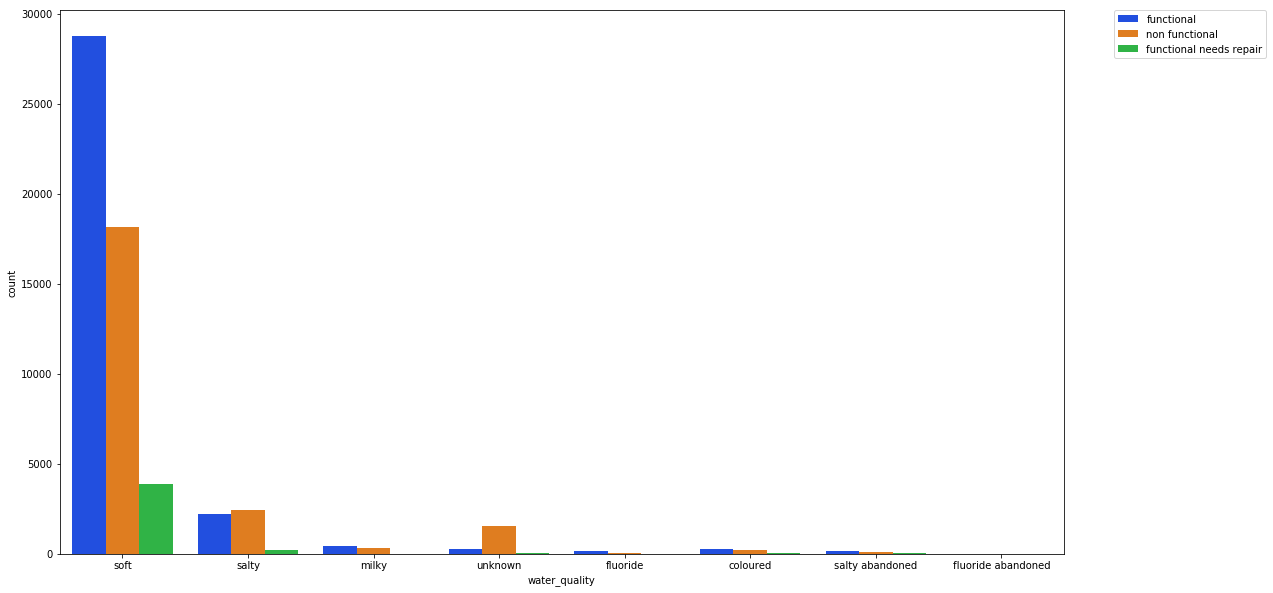

In [9]:
#lets look at water quality
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='water_quality',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.water_quality.value_counts()
# px.histogram(train, x='water_quality', color='status_group', title='Water Quality by Pump Status', template='plotly_dark')

In [36]:
#clearly, the salty water and unknown features have more non functional pumps, it would seem as though pumps built with
#soft water have a higher likelihood of functioning, even with the class imbalance

<Figure size 1296x720 with 0 Axes>

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

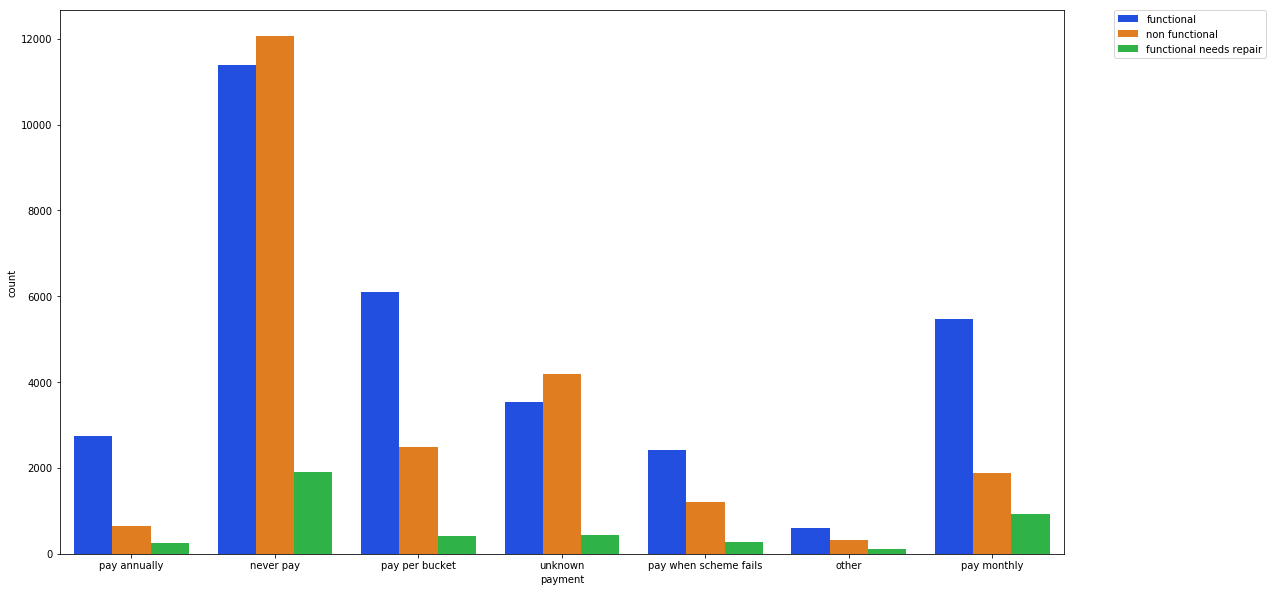

In [10]:
#lets look at payment
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='payment',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.payment.value_counts()
# px.histogram(train, x='payment', color='status_group', title='Water Pump Financing', template='plotly_dark')

In [38]:
#so we see htat a large number of pumps are never paid for by the population, it seems as though the pumps that are 
#being paid for are functioning in a more logical fashion, maybe the unpaid pumps are not serviced regularly becuase the 
#funder or installer doesn't care as much? 

<Figure size 1296x720 with 0 Axes>

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

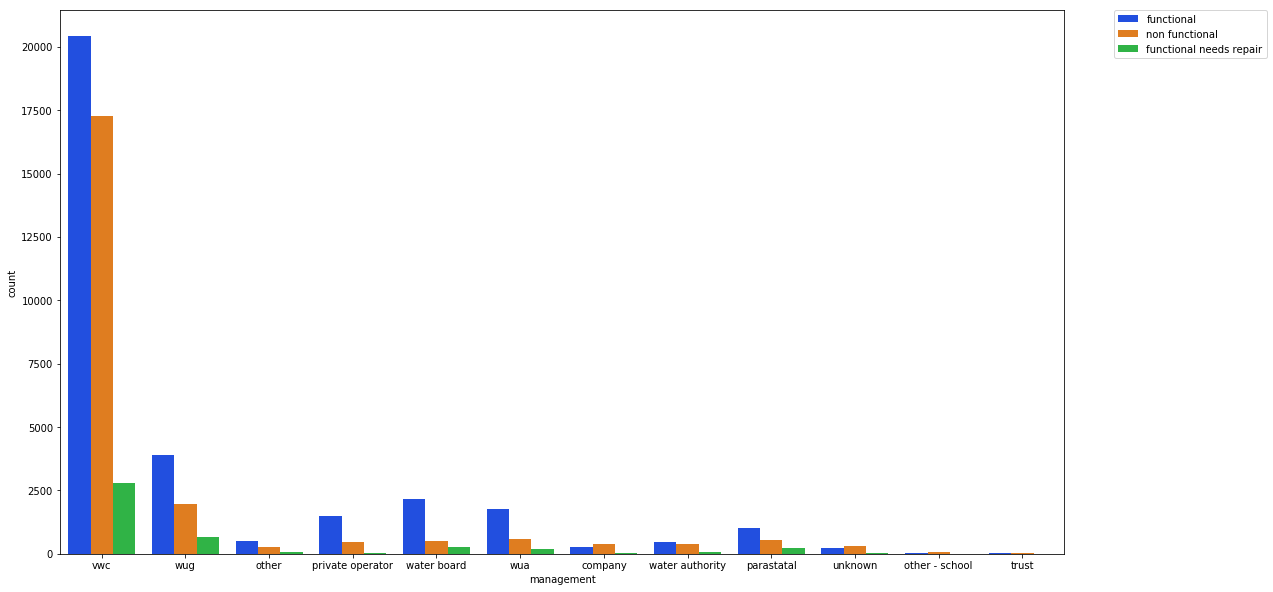

In [12]:
#lets look at management
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='management',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.management.value_counts()
# px.histogram(train, x='management', color='status_group', title='Pump Management Sectors', template='plotly_dark')

In [40]:
#woah, so the vwc manages a lot of these pumps, they aren't necessarily doing an awesome job, perhaps private operator
#pumps are better managed? the water authority is not doing too hot either

<Figure size 2880x2160 with 0 Axes>

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

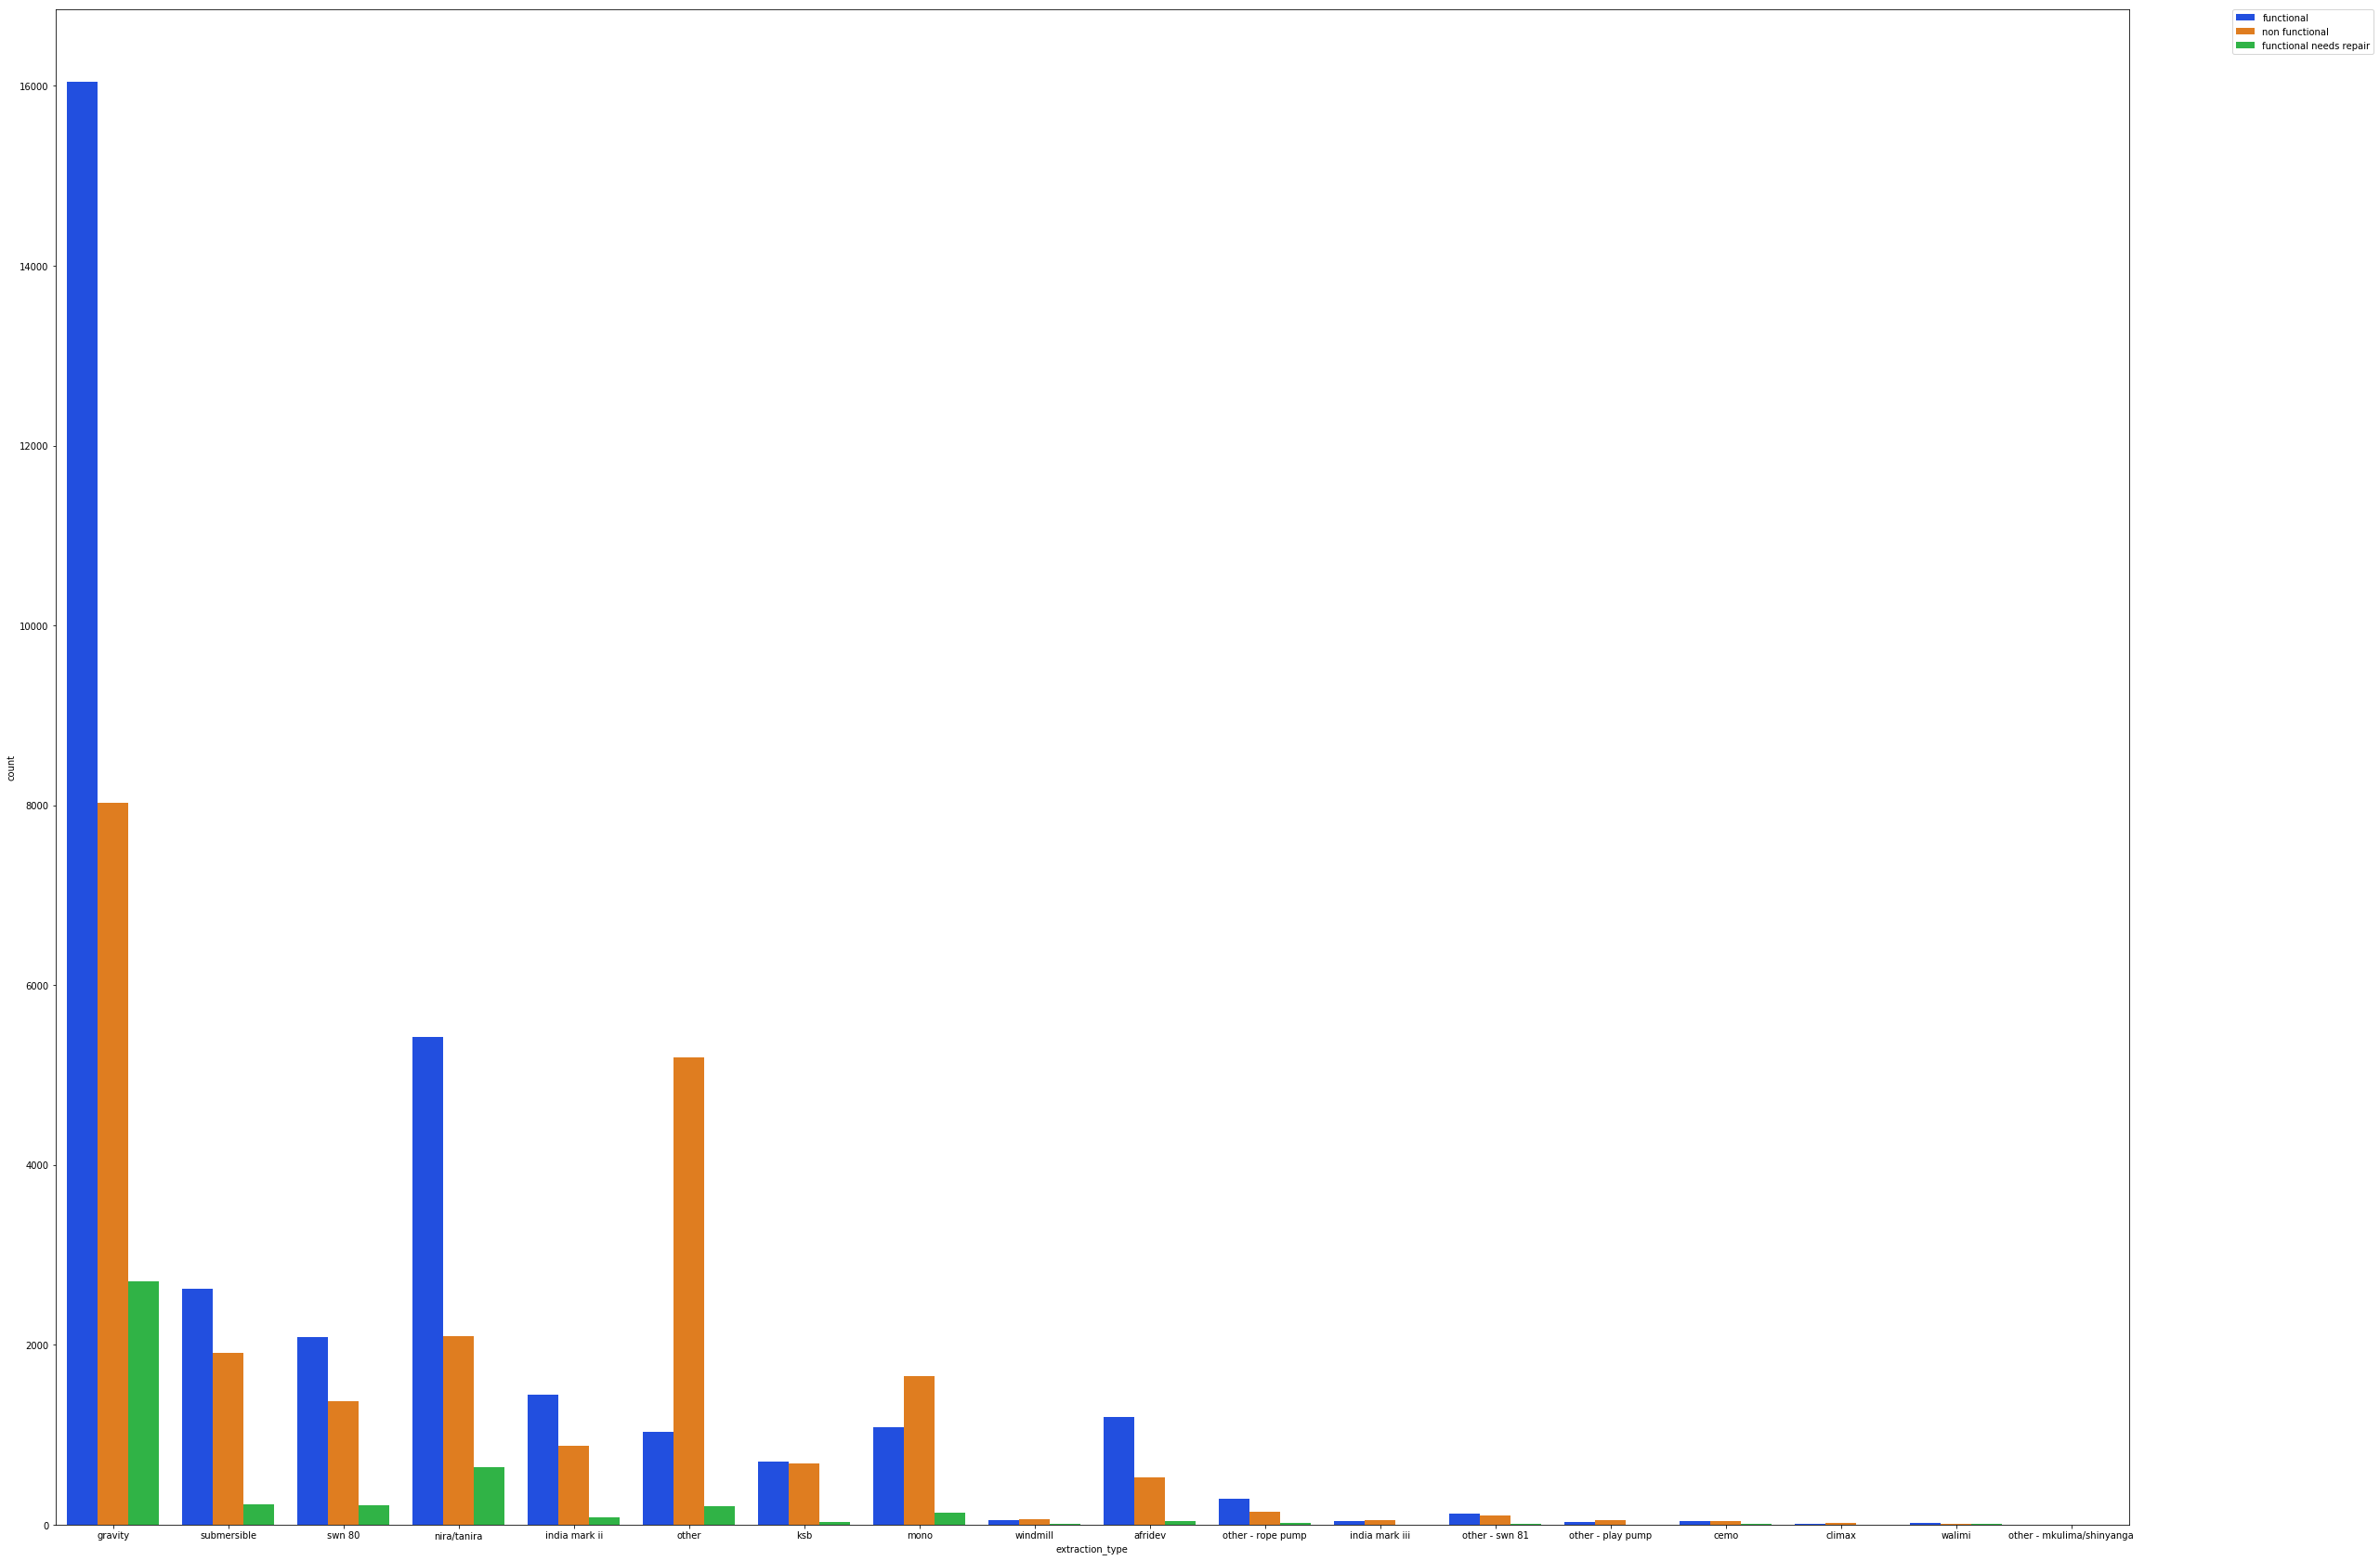

In [13]:
#lets look at extraction_type
plt.figure(figsize=(40, 30))
sns.countplot(data=train,x='extraction_type',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.extraction_type.value_counts()
# px.histogram(train, x='extraction_type', color='status_group', title='Extraction Type Frequency', template='plotly_dark')

In [42]:
#clearly some differences between certain pumps, gravity pumps seem to be the best

<Figure size 1296x720 with 0 Axes>

True     38852
False    17492
Name: permit, dtype: int64

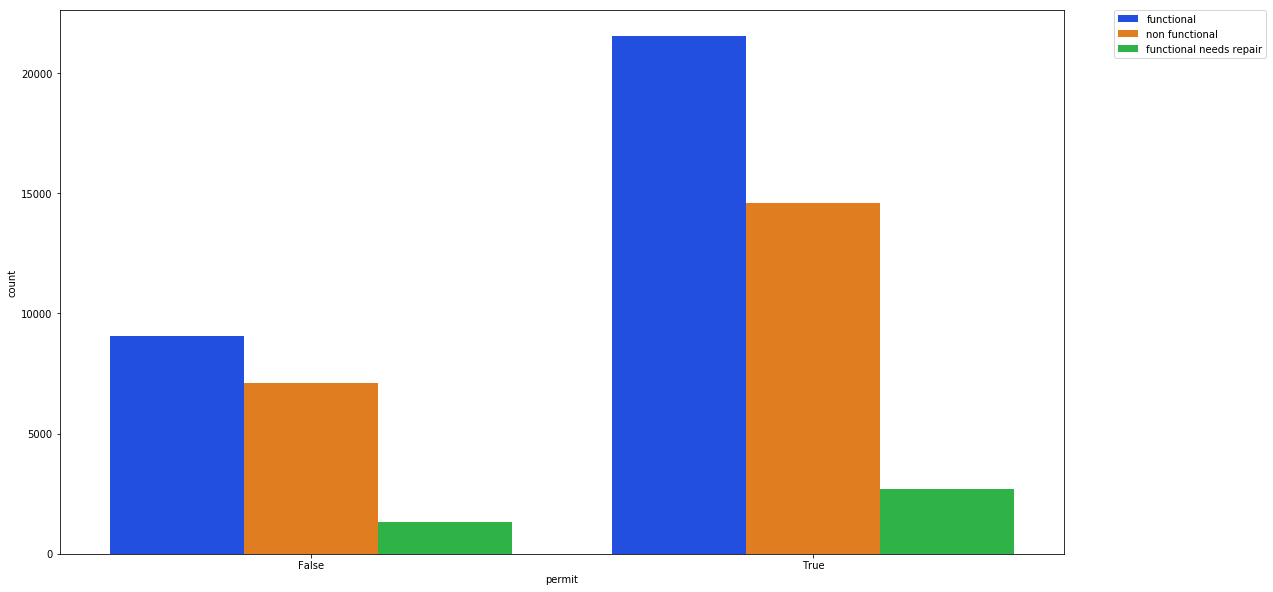

In [14]:
#look at permit
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='permit',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.permit.value_counts()
# px.histogram(train, x='permit', color='status_group', title='Permitted Pump Differences', template='plotly_dark')

In [44]:
#looks like permit could lend some usefulness? higher rates of functionality in permit holders 

<Figure size 1296x720 with 0 Axes>

True     51011
False     5055
Name: public_meeting, dtype: int64

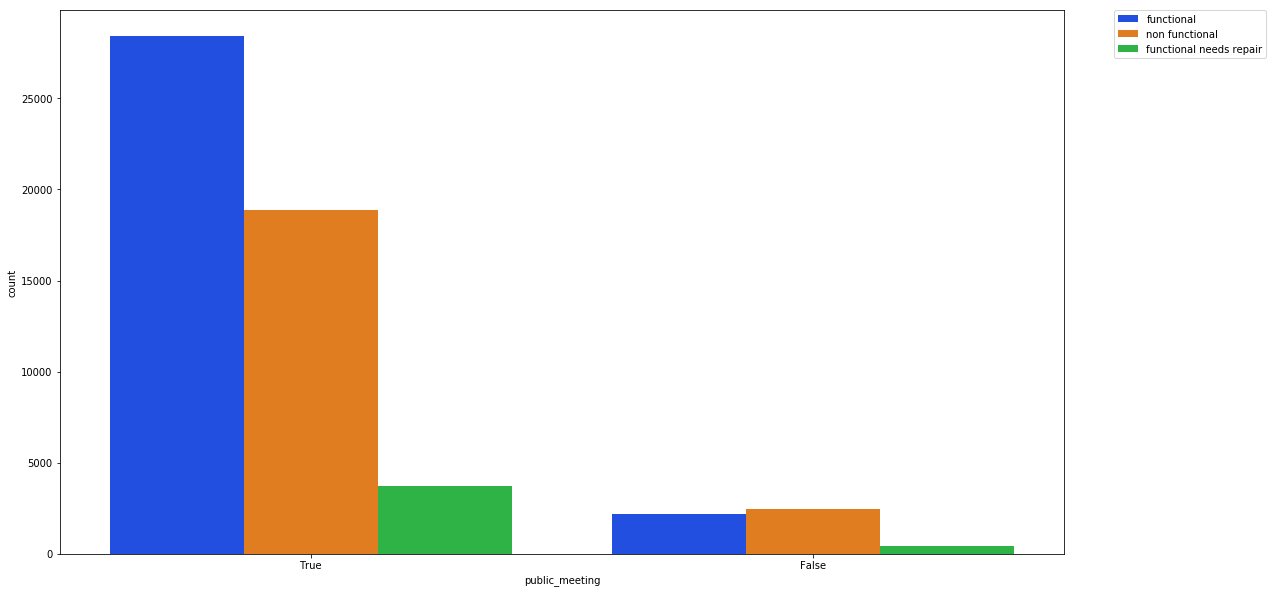

In [15]:
#lets look at public meeting
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='public_meeting',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.public_meeting.value_counts()
# px.histogram(train, x='public_meeting', color='status_group', title='Public Meeting by Pump Status', template='plotly_dark')

In [46]:
#no public meeting, while inbalanced class-wise, seems to have higher rates of non functionality

In [47]:
#lga is our next feature, since there are so many categories it wont visualize well, so lets look at a table
train.groupby(['lga', 'status_group']).size()

lga               status_group           
Arusha Rural      functional                 875
                  functional needs repair     48
                  non functional             329
Arusha Urban      functional                  42
                  functional needs repair      7
                  non functional              14
Babati            functional                 381
                  functional needs repair     53
                  non functional              77
Bagamoyo          functional                 730
                  functional needs repair      2
                  non functional             265
Bahi              functional                 158
                  non functional              66
Bariadi           functional                 580
                  functional needs repair    409
                  non functional             188
Biharamulo        functional                 274
                  functional needs repair     21
                  non funct

In [48]:
#looking through these values, there are some discrepancies between lgas and functionality

<Figure size 1800x720 with 0 Axes>

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

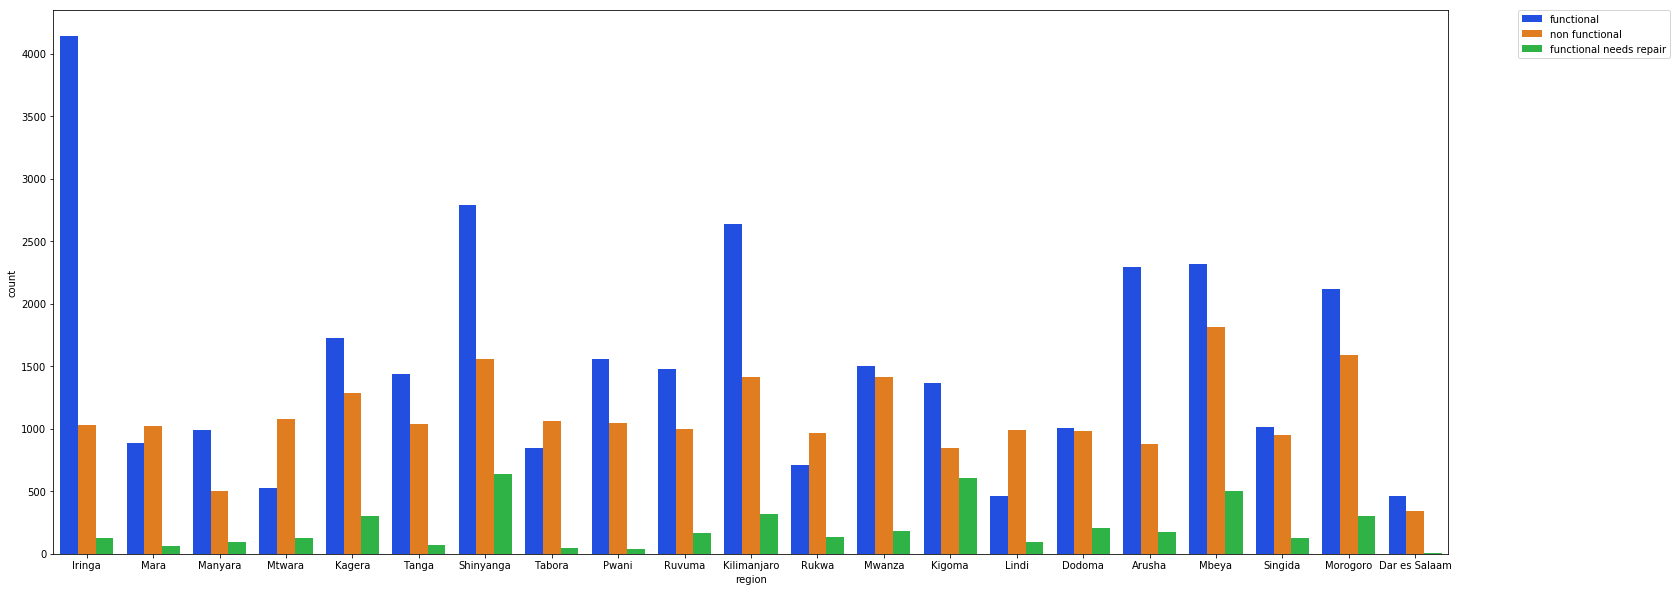

In [16]:
#lets look at region
plt.figure(figsize=(25, 10))
sns.countplot(data=train,x='region',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.region.value_counts()
# px.histogram(train, x='region', color='status_group', title='Pump Status by Region', template='plotly_dark')

In [51]:
#there appear to be differences betwween regions

<Figure size 1296x720 with 0 Axes>

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

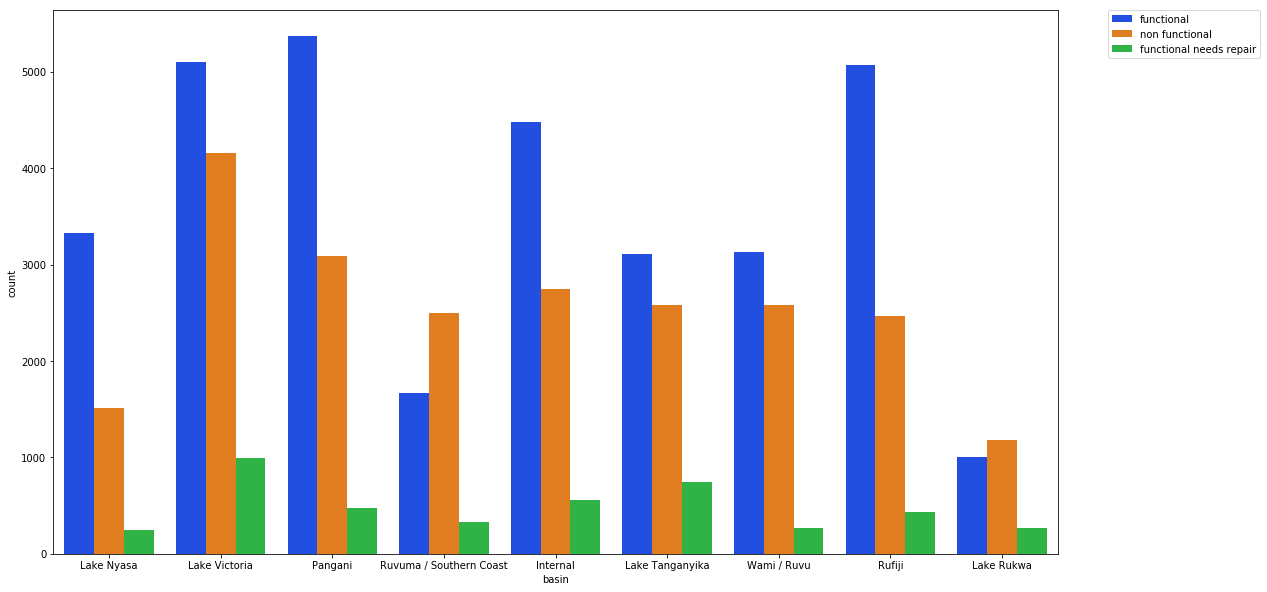

In [17]:
#lets look at basin
plt.figure(figsize=(18, 10))
sns.countplot(data=train,x='basin',hue='status_group', palette='bright')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
train.basin.value_counts()
# px.histogram(train, x='basin', color='status_group', title='Pumps by Basin', template='plotly_dark')

In [54]:
#definite differences here

In [55]:
#now that we have gotten to funder and installer as our next features to explore, I forgot to use them in our 
#groupby tables to see if we could use one over the other, lets do that now
train.groupby(['funder', 'installer']).size()
#looks like there are less categories in funder but maybe we should keep them both since the funder will not necessarily
#be the installer and the quality of installer does not necessarily speak to the quality of the funder/competence of the
#funder and visa versa

funder                       installer                
0                            0                            777
A/co Germany                 TPP TRUSTMOSHI                15
Aar                          AAR                            4
                             COCANE                        27
                             FOLAC                          1
Abas Ka                      KASHWA                         1
Abasia                       ABASIA                        29
                             DWE                           14
Abc-ihushi Development Cent  Buguba                         1
Abd                          ABD                            1
                             DWE                            6
Abdala                       ABDALA                         1
Abdul                        ABDUL                          1
Abood                        Gwaseco                        2
Abs                          Orien                          1
Aco/germany    

__We are aggregating these categories so that we can visualize them in relation to the status_group labels, since they seem intuitively important for classification here__

In [5]:
#reduce the funder feature into less categories
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def purple_donkey(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
train['funder'] = train.apply(lambda row: purple_donkey(row), axis=1)

In [6]:
#reduce the installer feature into less categories
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def cheese_soup(row):
    '''Keep top 5 values and set the rest to 'other'''
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    else:
        return 'other'  

train['installer'] = train.apply(lambda row: cheese_soup(row), axis=1)